https://www.reneshbedre.com/blog/pytorch-regression.html

In [1]:
import torch as th
from bioinfokit.analys import get_data
from cpl.data.processor_binance import BinanceProcessor
import numpy as np

In [2]:
ticker_list = ["BTCUSDT"]
start_date = "2021-12-01"
end_date = "2021-12-15"
time_interval = "1m"
tech_inds = ['macd']

In [3]:
p = BinanceProcessor("binance")
df = p.download_data(ticker_list, start_date, end_date, time_interval)
df = p.add_technical_indicator(df, tech_inds)

Succesfully add technical indicators


In [4]:
# 10 min ema
df['10mEWM'] = df['close'].ewm(span=10, adjust=False).mean()

In [5]:
df.head(2)

,time,open,high,low,close,volume,adj_close,tic,macd,10mEWM
0,2021-12-01 00:00:00,56782.0,56817.36,56780.0,56782.0,17.52761,56782.0,BTCUSDT,0.000000,56782.000000
1,2021-12-01 00:01:00,56782.0,56813.51,56740.0,56755.5,39.00328,56755.5,BTCUSDT,-0.594551,56777.181818


In [10]:
#prices -> log returns (day to first)
df['log_ret'] = np.log(df['close']) - np.log(df['close'].shift(1))
df.dropna(inplace=True)

In [13]:
horizon = 1

In [15]:
x_feats = ['log_ret',"volume",'macd']
y_feats = ['log_ret']

In [16]:
# convert variables to PyTorch tensor, y will be some shift 
X = th.tensor(df[x_feats][:-horizon].values, dtype=th.float32)
y = th.tensor(df[y_feats][horizon:].values, dtype=th.float32)

In [17]:
X.shape, y.shape

(torch.Size([9997, 3]), torch.Size([9997, 1]))

In [18]:
in_features = X.shape[1] # number of independent variables
out_features = y.shape[1] # dimension of predicted variables
# bias is default true and can be skipped
reg_model = th.nn.Linear(in_features=in_features, out_features=out_features, bias=True)

In [19]:
mse_loss = th.nn.MSELoss()

In [20]:
optimizer = th.optim.SGD(reg_model.parameters(), lr=0.00001)

In [21]:
# model training
# set epoch to 3K
optimizer.zero_grad()
n_epoch = 3000
for i in range(n_epoch):
    # predict model with current regression parameters
    # forward pass (feed the data to model)
    y_pred = reg_model(X)
    #print(y_pred)
    # calculate loss function
    step_loss = mse_loss(y_pred, y)
        
    # Backward to find the derivatives of the loss function with respect to regression parameters
    # make any stored gradients to zero
    # backward pass (go back and update the regression parameters to minimize the loss)
    optimizer.zero_grad()
    step_loss.backward()
    # update with current step regression parameters 
    optimizer.step()
    print ('epoch [{}], Loss: {:.2f}'.format(i, step_loss.item()))

epoch [0], Loss: 1229.94
epoch [1], Loss: 935.06
epoch [2], Loss: 727.17
epoch [3], Loss: 576.57
epoch [4], Loss: 464.49
epoch [5], Loss: 378.98
epoch [6], Loss: 312.27
epoch [7], Loss: 259.24
epoch [8], Loss: 216.43
epoch [9], Loss: 181.44
epoch [10], Loss: 152.58
epoch [11], Loss: 128.60
epoch [12], Loss: 108.56
epoch [13], Loss: 91.76
epoch [14], Loss: 77.62
epoch [15], Loss: 65.71
epoch [16], Loss: 55.65
epoch [17], Loss: 47.14
epoch [18], Loss: 39.95
epoch [19], Loss: 33.86
epoch [20], Loss: 28.71
epoch [21], Loss: 24.34
epoch [22], Loss: 20.65
epoch [23], Loss: 17.51
epoch [24], Loss: 14.86
epoch [25], Loss: 12.61
epoch [26], Loss: 10.70
epoch [27], Loss: 9.08
epoch [28], Loss: 7.71
epoch [29], Loss: 6.55
epoch [30], Loss: 5.57
epoch [31], Loss: 4.73
epoch [32], Loss: 4.03
epoch [33], Loss: 3.43
epoch [34], Loss: 2.92
epoch [35], Loss: 2.49
epoch [36], Loss: 2.12
epoch [37], Loss: 1.81
epoch [38], Loss: 1.55
epoch [39], Loss: 1.33
epoch [40], Loss: 1.14
epoch [41], Loss: 0.98
epo

epoch [965], Loss: 0.09
epoch [966], Loss: 0.09
epoch [967], Loss: 0.09
epoch [968], Loss: 0.09
epoch [969], Loss: 0.09
epoch [970], Loss: 0.09
epoch [971], Loss: 0.09
epoch [972], Loss: 0.09
epoch [973], Loss: 0.09
epoch [974], Loss: 0.09
epoch [975], Loss: 0.09
epoch [976], Loss: 0.09
epoch [977], Loss: 0.09
epoch [978], Loss: 0.09
epoch [979], Loss: 0.09
epoch [980], Loss: 0.09
epoch [981], Loss: 0.09
epoch [982], Loss: 0.09
epoch [983], Loss: 0.09
epoch [984], Loss: 0.09
epoch [985], Loss: 0.09
epoch [986], Loss: 0.09
epoch [987], Loss: 0.09
epoch [988], Loss: 0.09
epoch [989], Loss: 0.09
epoch [990], Loss: 0.09
epoch [991], Loss: 0.09
epoch [992], Loss: 0.09
epoch [993], Loss: 0.09
epoch [994], Loss: 0.09
epoch [995], Loss: 0.09
epoch [996], Loss: 0.09
epoch [997], Loss: 0.09
epoch [998], Loss: 0.09
epoch [999], Loss: 0.09
epoch [1000], Loss: 0.09
epoch [1001], Loss: 0.09
epoch [1002], Loss: 0.09
epoch [1003], Loss: 0.09
epoch [1004], Loss: 0.09
epoch [1005], Loss: 0.09
epoch [100

epoch [1968], Loss: 0.09
epoch [1969], Loss: 0.09
epoch [1970], Loss: 0.09
epoch [1971], Loss: 0.09
epoch [1972], Loss: 0.09
epoch [1973], Loss: 0.09
epoch [1974], Loss: 0.09
epoch [1975], Loss: 0.09
epoch [1976], Loss: 0.09
epoch [1977], Loss: 0.09
epoch [1978], Loss: 0.09
epoch [1979], Loss: 0.09
epoch [1980], Loss: 0.09
epoch [1981], Loss: 0.09
epoch [1982], Loss: 0.09
epoch [1983], Loss: 0.09
epoch [1984], Loss: 0.09
epoch [1985], Loss: 0.09
epoch [1986], Loss: 0.09
epoch [1987], Loss: 0.09
epoch [1988], Loss: 0.09
epoch [1989], Loss: 0.09
epoch [1990], Loss: 0.09
epoch [1991], Loss: 0.09
epoch [1992], Loss: 0.09
epoch [1993], Loss: 0.09
epoch [1994], Loss: 0.09
epoch [1995], Loss: 0.09
epoch [1996], Loss: 0.09
epoch [1997], Loss: 0.09
epoch [1998], Loss: 0.09
epoch [1999], Loss: 0.09
epoch [2000], Loss: 0.09
epoch [2001], Loss: 0.09
epoch [2002], Loss: 0.09
epoch [2003], Loss: 0.09
epoch [2004], Loss: 0.09
epoch [2005], Loss: 0.09
epoch [2006], Loss: 0.09
epoch [2007], Loss: 0.09


In [22]:
# estimate reg params
# bias b (offset or y-intercept), # weight (w)
reg_model.bias.item(), reg_model.weight.item()

ValueError: only one element tensors can be converted to Python scalars

In [23]:
#plot
from bioinfokit.visuz import stat
# detach will not build a gradient computational graph (no backpropagation) 
y_pred = reg_model(X).detach()
df['yhat']=y_pred.numpy()

ValueError: Length of values (9997) does not match length of index (9998)

KeyError: 'area'

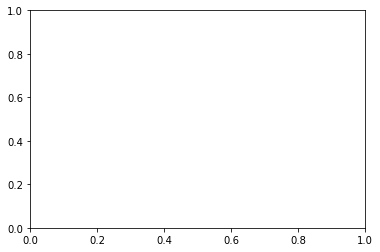

In [24]:
stat.regplot(df=df, x='area', y='ntv_rich', yhat='yhat')
#???

In [27]:
y_pred.detach()

tensor([[-0.2373],
        [-0.2764],
        [-0.2924],
        ...,
        [-0.2841],
        [-0.2716],
        [-0.1833]])

In [28]:
y

tensor([[-6.1088e-04],
        [-1.4633e-05],
        [-9.8030e-05],
        ...,
        [ 6.7271e-04],
        [-1.2438e-03],
        [ 4.1388e-04]])

In [25]:
# measure r2
from sklearn.metrics import r2_score
r2_score(y_true=y, y_pred=y_pred.detach().numpy())

-25588.940014371485

In [26]:
#prediction
area = 3
# predict y (ntv_rich) value when X (area) is 3
y_pred = reg_model(th.tensor([[area]], dtype=th.float32)).detach()
y_pred.item()

RuntimeError: mat1 and mat2 shapes cannot be multiplied (1x1 and 3x1)